### State Schema With DataClasses
When we define a LangGraph StateGraph, we use a state schema.

The state schema represents the structure and types of data that our graph will use.

All nodes are expected to communicate with that schema.

LangGraph offers flexibility in how you define your state schema, accommodating various Python types and validation approaches!


 we can use the TypedDict class from python's typing module.

It allows you to specify keys and their corresponding value types.

But, note that these are type hints.

They can be used by static type checkers (like mypy) or IDEs to catch potential type-related errors before the code is run.

But they are not enforced at runtime!

In [1]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    name:str
    game:Literal["cricket","football"]

In [2]:
def play_game(state:TypedDictState):
    print("---Play Game node has been called--")
    return {"name":state['name'] + " want to play "}

def cricket(state:TypedDictState):
    print("-- Cricket node has been called--")
    return {"name":state["name"] + " cricket","game":"cricket"}

def football(state:TypedDictState):
    print("-- Football node has been called--")
    return {"name":state["name"] + " football","game":"football"}

In [3]:
import random
def decide_play(state:TypedDictState)->Literal["cricket","football"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "football"

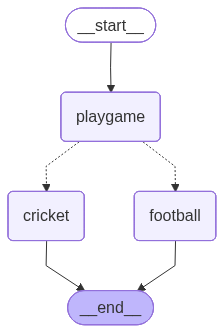

In [4]:

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder=StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("football",football)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("football",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [5]:
graph.invoke({"name":"Ram"})

---Play Game node has been called--
-- Football node has been called--


{'name': 'Ram want to play  football', 'game': 'football'}

In [11]:
graph.invoke({"name":1234}) # This will raise a validation error

---Play Game node has been called--


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [7]:
### Pydantic (Python )

### Dataclasses
Python's dataclasses provide another way to define structured data.

Dataclasses offer a concise syntax for creating classes that are primarily used to store data.

In [12]:
### DataClasses

from dataclasses import dataclass

@dataclass
class DataClassState:
    name:str
    game:Literal["football","cricket"]

In [13]:
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {"name":state.name + " want to play "}

def cricket(state:DataClassState):
    print("-- Cricket node has been called--")
    return {"name":state.name + " cricket","game":"cricket"}

def football(state:DataClassState):
    print("-- Football node has been called--")
    return {"name":state.name + " football","game":"football"}

In [16]:
import random
def decide_play(state:DataClassState)->Literal["cricket","football"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "football"

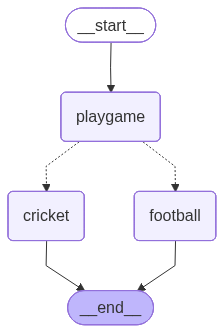

In [17]:

builder=StateGraph(DataClassState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("football",football)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("football",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke(DataClassState(name="Ram",game="football"))

---Play Game node has been called--
-- Cricket node has been called--


{'name': 'Ram want to play  cricket', 'game': 'cricket'}

In [19]:
graph.invoke(DataClassState(name="Ram",game="football"))

---Play Game node has been called--
-- Cricket node has been called--


{'name': 'Ram want to play  cricket', 'game': 'cricket'}